In [22]:
import pandas as pd
from sodapy import Socrata
import case_3_api as c3api


In [23]:
#!pip install sodapy

In [24]:
df = c3api.get_RDW_brandstof(500000)

In [25]:
df.value_counts('brandstof_omschrijving')

brandstof_omschrijving
Benzine          413477
Diesel            71538
LPG                7579
Elektriciteit      6796
Alcohol             259
CNG                 208
LNG                 134
Waterstof             9
dtype: int64

In [26]:

print(c3api.get_RDW_brandstof(100).head())
print(c3api.get_RDW_kenteken_df(100).head())
print(c3api.get_OCM_df(100).head())

  kenteken brandstof_volgnummer brandstof_omschrijving  \
0   0001TJ                    1                Benzine   
1   0001TV                    1                Benzine   
2   0001VH                    1                Benzine   
3   0001VM                    1                Benzine   
4   0002GV                    1                 Diesel   

  emissiecode_omschrijving uitlaatemissieniveau opgegeven_maximum_snelheid  \
0                        0               EURO 0                        NaN   
1                        0               EURO 0                        NaN   
2                        0                  NaN                        NaN   
3                        0               EURO 0                        NaN   
4                      NaN                  NaN                      25.00   

  nettomaximumvermogen geluidsniveau_rijdend geluidsniveau_stationair  \
0                  NaN                   NaN                      NaN   
1                  NaN              

In [ ]:
client = Socrata("opendata.rdw.nl", None)
results = client.get("m9d7-ebf2", limit=2000,offset=1)
results_df = pd.DataFrame.from_records(results)
results_df.shape

(2000, 66)

In [ ]:
len(client.get_metadata("m9d7-ebf2")['columns'])

92

## Hanna Code Histogram

In [ ]:
laadpaal = pd.read_csv("data/laadpaaldata.csv")
print(laadpaal)

                   Started                Ended  TotalEnergy  ConnectedTime  \
0      2018-01-01 08:45:26  2018-01-01 09:16:45         1830        0.52190   
1      2018-01-01 11:26:40  2018-01-01 14:36:13        28641        3.15920   
2      2018-01-01 12:39:28  2018-01-01 20:58:10        65534        8.31170   
3      2018-01-01 14:26:58  2018-01-02 06:36:55        10080       16.16580   
4      2018-01-01 14:50:05  2018-01-01 17:21:50         7180        2.52920   
...                    ...                  ...          ...            ...   
10183  2018-12-31 16:25:27  2018-01-01 10:32:33         4300       18.11830   
10184  2018-12-31 16:54:19  2018-12-31 18:33:33         5880        1.65390   
10185  2018-12-31 18:29:44  2018-01-01 11:14:15        22020       16.74000   
10186  2018-12-31 18:35:38  2018-12-31 22:08:37         6939        3.54970   
10187  2018-12-31 19:34:55  2018-01-01 00:46:04         8713        5.18583   

       ChargeTime  MaxPower  
0         0.52190    

## Data Cleaning - Hanna

In [68]:
!streamlit run case_3.py

### DC ConnectedTime en ChargeTime

In [31]:
# Geen ontbrekende data
laadpaal.isna().sum() 

Started          0
Ended            0
TotalEnergy      0
ConnectedTime    0
ChargeTime       0
MaxPower         0
dtype: int64

In [32]:
laadpaal.drop_duplicates()

,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower
0,2018-01-01 08:45:26,2018-01-01 09:16:45,1830,0.52190,0.52190,3524
1,2018-01-01 11:26:40,2018-01-01 14:36:13,28641,3.15920,2.30560,13680
2,2018-01-01 12:39:28,2018-01-01 20:58:10,65534,8.31170,8.31170,11200
3,2018-01-01 14:26:58,2018-01-02 06:36:55,10080,16.16580,4.30060,3360
4,2018-01-01 14:50:05,2018-01-01 17:21:50,7180,2.52920,2.06560,3758
...,...,...,...,...,...,...
10183,2018-12-31 16:25:27,2018-01-01 10:32:33,4300,18.11830,2.32583,3400
10184,2018-12-31 16:54:19,2018-12-31 18:33:33,5880,1.65390,1.65390,3572
10185,2018-12-31 18:29:44,2018-01-01 11:14:15,22020,16.74000,5.75000,4560
10186,2018-12-31 18:35:38,2018-12-31 22:08:37,6939,3.54970,3.25890,3277


In [33]:
# Foute data wordt gefiltered
def dropinvalid_leap(Datum):
    try:
        pd.to_datetime(Datum)
        return False
    except:
        print(Datum)
        return True

laadpaal_cleaned = laadpaal[~laadpaal['Started'].apply(dropinvalid_leap)]
laadpaal_cleaned = laadpaal_cleaned[~laadpaal_cleaned['Ended'].apply(dropinvalid_leap)]


2018-02-29 07:37:53
2018-02-29 07:46:07


In [34]:
laadpaal_cleaned['Started'] = pd.to_datetime(laadpaal_cleaned['Started'])
laadpaal_cleaned['Ended'] = pd.to_datetime(laadpaal_cleaned['Ended'])

# Tijdverschil tussen 'Started' en 'Ended'
laadpaal_cleaned['TotalTime'] = (laadpaal_cleaned['Ended'] - laadpaal_cleaned['Started']) / pd.Timedelta(hours=1)

laadpaal_cleaned.head(100)

,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower,TotalTime
0,2018-01-01 08:45:26,2018-01-01 09:16:45,1830,0.5219,0.5219,3524,0.521944
1,2018-01-01 11:26:40,2018-01-01 14:36:13,28641,3.1592,2.3056,13680,3.159167
2,2018-01-01 12:39:28,2018-01-01 20:58:10,65534,8.3117,8.3117,11200,8.311667
3,2018-01-01 14:26:58,2018-01-02 06:36:55,10080,16.1658,4.3006,3360,16.165833
4,2018-01-01 14:50:05,2018-01-01 17:21:50,7180,2.5292,2.0656,3758,2.529167
...,...,...,...,...,...,...,...
95,2018-01-04 15:53:48,2018-01-05 08:50:38,47470,16.9472,5.6972,11741,16.947222
96,2018-01-04 17:40:28,2018-01-04 19:26:39,5260,1.7697,1.7697,3284,1.769722
97,2018-01-04 17:42:56,2018-01-04 19:24:37,3730,1.6947,1.6947,2760,1.694722
98,2018-01-04 18:06:35,2018-01-05 07:10:51,10176,13.0711,4.7672,3233,13.071111


### Kolom toevoegen: Average Energy = TotalEnergy / ChargeTime 

In [35]:
# Toevoegen kolom AvgPower (W)
laadpaal_cleaned['AvgPower'] = (laadpaal_cleaned['TotalEnergy'] / laadpaal_cleaned['ChargeTime']) 

laadpaal_cleaned.head(100)

,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower,TotalTime,AvgPower
0,2018-01-01 08:45:26,2018-01-01 09:16:45,1830,0.5219,0.5219,3524,0.521944,3506.418854
1,2018-01-01 11:26:40,2018-01-01 14:36:13,28641,3.1592,2.3056,13680,3.159167,12422.362942
2,2018-01-01 12:39:28,2018-01-01 20:58:10,65534,8.3117,8.3117,11200,8.311667,7884.548287
3,2018-01-01 14:26:58,2018-01-02 06:36:55,10080,16.1658,4.3006,3360,16.165833,2343.858996
4,2018-01-01 14:50:05,2018-01-01 17:21:50,7180,2.5292,2.0656,3758,2.529167,3475.987607
...,...,...,...,...,...,...,...,...
95,2018-01-04 15:53:48,2018-01-05 08:50:38,47470,16.9472,5.6972,11741,16.947222,8332.163168
96,2018-01-04 17:40:28,2018-01-04 19:26:39,5260,1.7697,1.7697,3284,1.769722,2972.255184
97,2018-01-04 17:42:56,2018-01-04 19:24:37,3730,1.6947,1.6947,2760,1.694722,2200.979524
98,2018-01-04 18:06:35,2018-01-05 07:10:51,10176,13.0711,4.7672,3233,13.071111,2134.586340


In [65]:
#afronden, uur, start/eindpunt per kwartier data punten . sequence py. list > df normalize . Functies 1/2: date.range / explode
#apply function
# date_range_func = pd.date_range(start='2018-01-01', end='2018-12-31', freq= '15T')
# date_range_func

In [64]:
# df1 = pd.DataFrame({'date': date_range_func})

# # use the explode function to create a new row for each date
# df1 = df1.explode('date')

# # print the resulting DataFrame
# print(df1)

In [63]:
# laadpaal_cleaned["PerTime"] = df1
# laadpaal_cleaned #kijken hoeveel kwartieren start/end -> afronden -> voor ieder kwartier hoeveel stroom -> nieuwe tabel index kwartier start/end en hoeveel stroom avgpower optellen dat is totale stroom

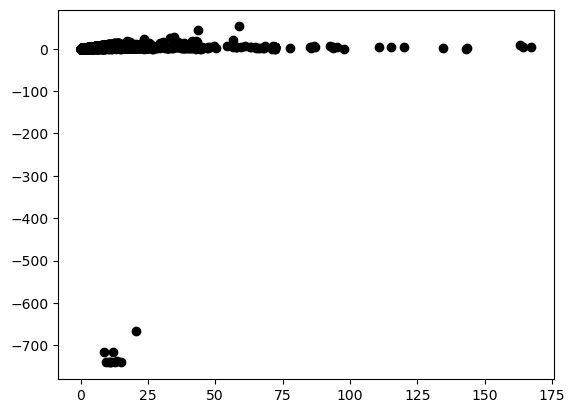

In [36]:
#Scatterplot maken voor overzicht

import matplotlib.pyplot as plt

plt.scatter(laadpaal['ConnectedTime'], laadpaal["ChargeTime"], color='black')
plt.show()

In [37]:
# Filteren op laadsessies waarbij ChargeTime > 0 uur is en  <= 40
laadpaal_cleaned = laadpaal_cleaned[(laadpaal_cleaned["ChargeTime"] > 0) & (laadpaal_cleaned["ChargeTime"] <= 48) & (laadpaal_cleaned["ConnectedTime"] <= 40)]

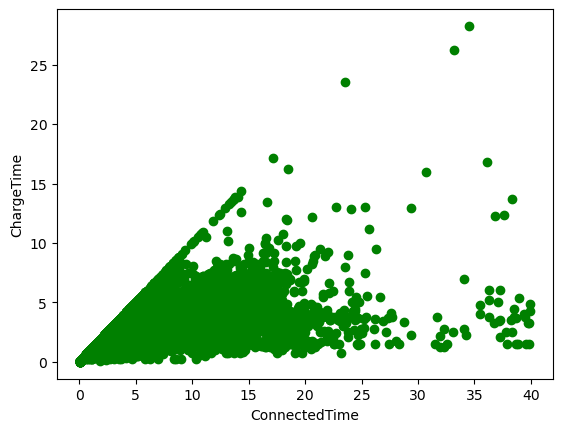

In [38]:
# Scatter plot maken van ChargeTime vs ConnectedTime
plt.scatter(laadpaal_cleaned['ConnectedTime'], laadpaal_cleaned["ChargeTime"], color='green') 
plt.xlabel('ConnectedTime')
plt.ylabel('ChargeTime')
plt.show()
#We zien geen bepaalde gekke outliers of waardes

###  DC MaxPower en TotalEnergy

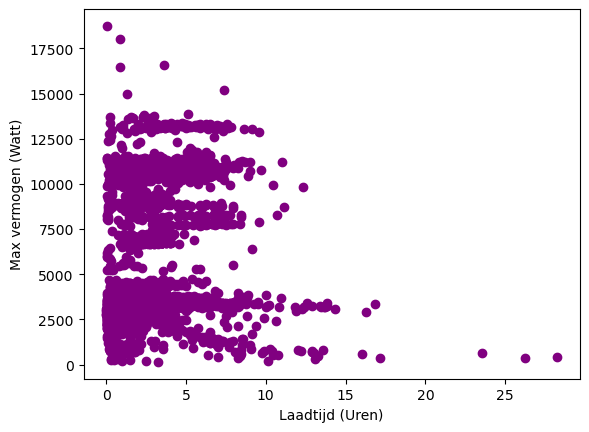

In [39]:
# Scatter plot maken van ChargeTime vs MaxPower
plt.scatter(laadpaal_cleaned['ChargeTime'], laadpaal_cleaned["MaxPower"], color='purple') 
plt.xlabel('Laadtijd (Uren)')
plt.ylabel('Max vermogen (Watt)')
plt.show()

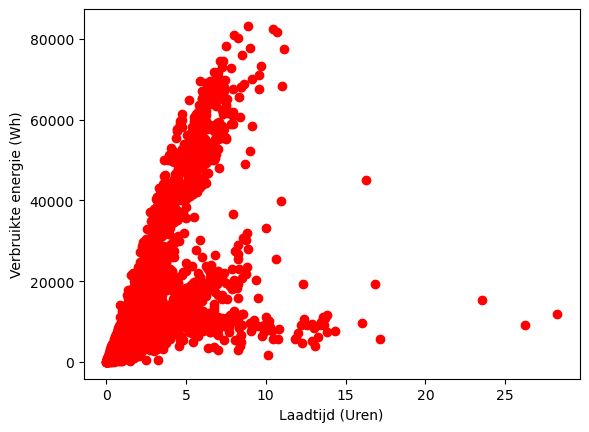

In [40]:
# Scatter plot maken van ChargeTime vs TotalEnergy
plt.scatter(laadpaal_cleaned['ChargeTime'], laadpaal_cleaned["TotalEnergy"], color='red') 
plt.xlabel('Laadtijd (Uren)')
plt.ylabel('Verbruikte energie (Wh)')
plt.show()

# Het uitwerken (nieuwe variabelen)

### Gemiddelde bezetting van een laadpaal

### Verschil tussen laden en bezetten van een laadpaal

### Gemiddeld laadprofiel

In [ ]:
#Om het gemiddelde laadprofiel te bepalen, zou je het totale verbruikte energie kunnen plotten tegen de tijd van de dag.
#Dit zou kunnen helpen om piekuren te identificeren en de gemiddelde laadsnelheid tijdens verschillende tijdsintervallen te bepalen.
#Totaal verbruikte energie in Wh

### Verdeling in vermogens

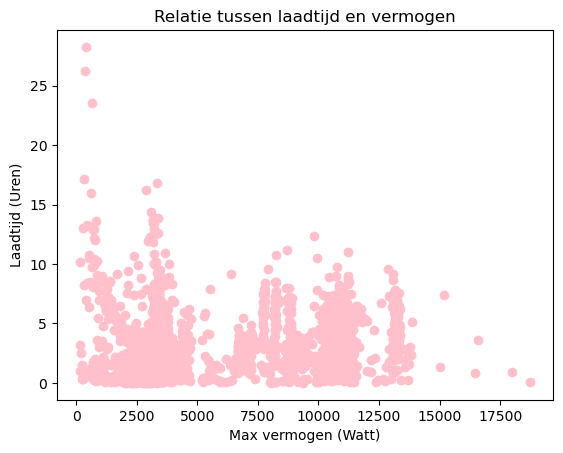

In [41]:
import matplotlib.pyplot as plt

#Bij presentatie laten zien
max_power = laadpaal_cleaned["MaxPower"]
charge_time = laadpaal_cleaned["ChargeTime"]

plt.scatter(max_power, charge_time, color='pink')

plt.title("Relatie tussen laadtijd en vermogen")
plt.xlabel("Max vermogen (Watt)")
plt.ylabel("Laadtijd (Uren)")

plt.show()


## Histogram

In [42]:
import numpy as np

#Berekenen mean en mediaan
mean_charge_time = np.mean(laadpaal_cleaned["ChargeTime"])
median_charge_time = np.median(laadpaal_cleaned["ChargeTime"])
print("Mean charge time:", mean_charge_time)
print("Median charge time:", median_charge_time)

Mean charge time: 2.4836791128629336
Median charge time: 2.2336


In [43]:
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np

# #Titles aanpassen, aantal laadsessies en slider toevoegen
# #fig = px.histogram(laadpaal_cleaned, x="ChargeTime", title = "Histogram van de laadtijd", 
#                    labels={"ChargeTime": "Laadtijd (Uren)"}, 
#                    color_discrete_sequence = ['firebrick'], opacity = 0.8, 
#                    marginal= "rug"
#                    )

x = [laadpaal_cleaned["ChargeTime"]]
group_labels = ['Laadtijd']
colors = ['mediumvioletred']

fig = ff.create_distplot(x, group_labels, colors=colors, show_rug=False, bin_size=0.2)

#Annotaties en lijntjes van de mean en median
fig.add_vline(x=mean_charge_time, line_color="black", line_dash="dash")
fig.add_annotation(x=mean_charge_time, y=0.3, text="<b>Gemiddelde laadtijd 2.49 uur</b>", 
                   showarrow=True, arrowhead=1, arrowcolor='black', ax=240, ay=0)

fig.add_vline(x=median_charge_time, line_color="black", line_dash="dot")
fig.add_annotation(x=median_charge_time, y=0.4, text="<b>Mediaan laadtijd 2.23 uur</b>", 
                   showarrow=True, arrowhead=1, arrowcolor='black', ax=220, ay=0)

#fig.update_layout(title='Dist Plot')

fig.update_layout(
    title="Histogram van laadtijden elektrische auto's met benadering kansdichtheidsfunctie",
    autosize=False,
    width=800,
    height=700,
    xaxis_title= "Laadtijd (Uren)",
    yaxis_title= "Dichtheid",
    xaxis=dict(
        range=[min(laadpaal_cleaned["ChargeTime"]), max(laadpaal_cleaned["ChargeTime"])],
        rangemode='normal', rangeselector=dict(
            buttons=list([
                dict(count=0, label='0', step='hour', stepmode='backward'),
                dict(count=10, label='10', step='hour', stepmode='backward'),
                dict(count=20, label='20', step='hour', stepmode='backward'),
                dict(count=30, label='30', step='hour', stepmode='backward'),
                dict(count=40, label='40', step='hour', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="linear"
    )
)

fig.show()